In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("aug_train.csv")
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [11]:
q1=df["training_hours"].quantile(0.25)
q3=df["training_hours"].quantile(0.75)
iqr = q3-q1

In [13]:
min_x = q1-(1.5*iqr)
max_x = q3+(1.5*iqr)
min_x,max_x

(-74.5, 185.5)

In [17]:
df=df[df["training_hours"]<=max_x]

C:\Users\HP\AppData\Local\Temp\ipykernel_21580\2216959825.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["training_hours"])


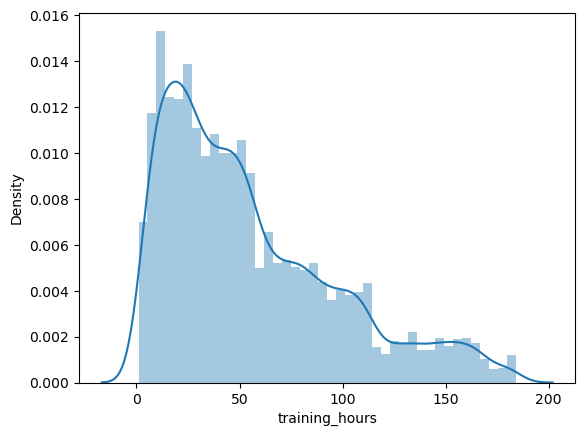

In [21]:
sns.distplot(df["training_hours"])
plt.show()

In [27]:
from sklearn.preprocessing import FunctionTransformer

In [31]:
fn = FunctionTransformer(func=np.log1p)

In [33]:
fn.fit(df[["training_hours"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [41]:
df["training_hours_ft"]=fn.transform(df[["training_hours"]])

C:\Users\HP\AppData\Local\Temp\ipykernel_21580\179920261.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["training_hours"])


KeyError: 'training_hours_ft'

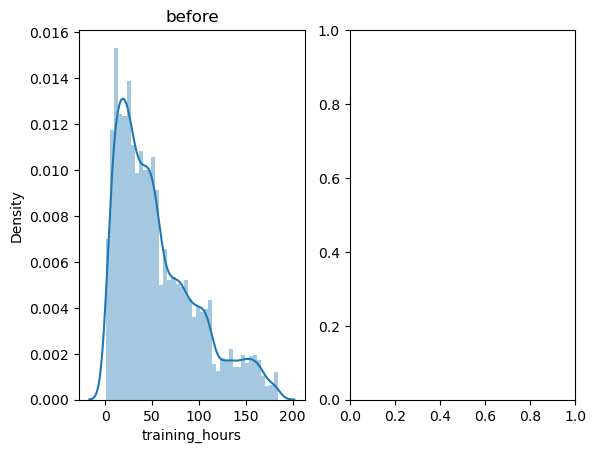

In [75]:
plt.subplot(1,2,1)
sns.distplot(df["training_hours"])
plt.title("before")

plt.subplot(1,2,2)
sns.distplot(df["training_hours_ft"])
plt.title("After")
plt.show()

In [77]:
dt = pd.read_csv("aug_train.csv")
dt.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [83]:
a1=dt["training_hours"].quantile(0.25)
a3=dt["training_hours"].quantile(0.75)
IQR = a3-a1

In [85]:
mini_x = a1-(1.5*iqr)
maxi_x = a3+(1.5*iqr)
mini_x,maxi_x

(-74.5, 185.5)

In [87]:
dt=dt[dt["training_hours"]<=maxi_x]

C:\Users\HP\AppData\Local\Temp\ipykernel_21580\3472860916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt["training_hours"])


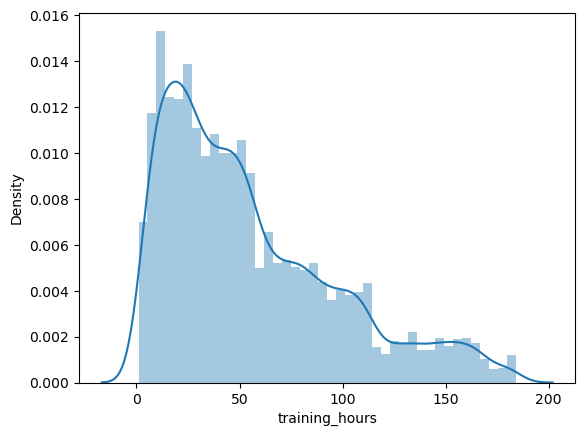

In [89]:
sns.distplot(dt["training_hours"])
plt.show()

In [91]:
from sklearn.preprocessing import FunctionTransformer

In [95]:
ft = FunctionTransformer(func=lambda x: x**2)

In [99]:
ft.fit(dt[["training_hours"]])

FunctionTransformer(func=<function <lambda> at 0x000001A0E6E92340>)

In [101]:
dt["training_hours_ft"]=ft.transform(dt[["training_hours"]])

C:\Users\HP\AppData\Local\Temp\ipykernel_21580\751710701.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt["training_hours"])
C:\Users\HP\AppData\Local\Temp\ipykernel_21580\751710701.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt["training_hours_ft"])


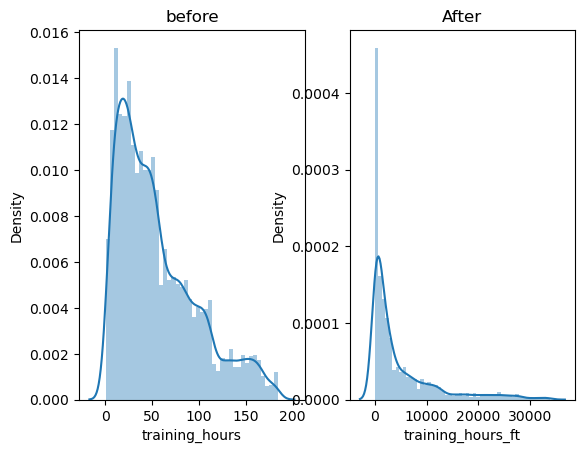

In [103]:
plt.subplot(1,2,1)
sns.distplot(dt["training_hours"])
plt.title("before")

plt.subplot(1,2,2)
sns.distplot(dt["training_hours_ft"])
plt.title("After")
plt.show()